In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("Datasets/insurance.csv")
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(df.isna().sum())
df


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

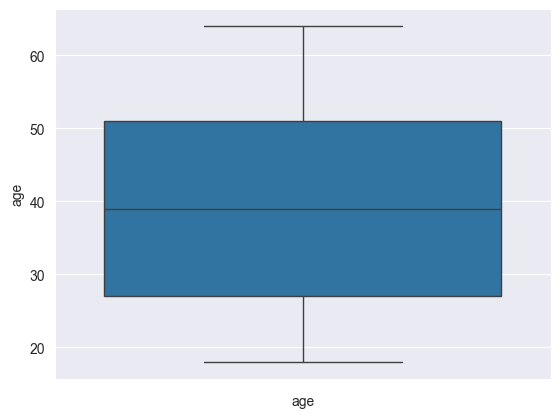

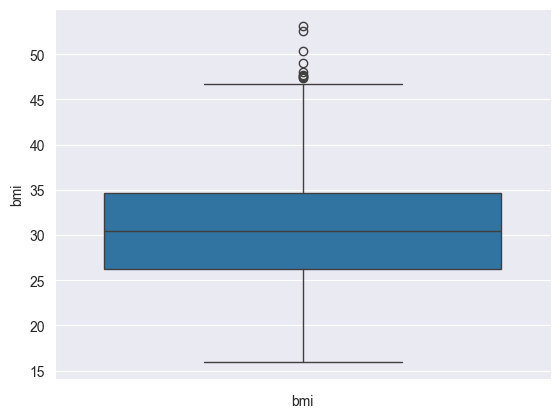

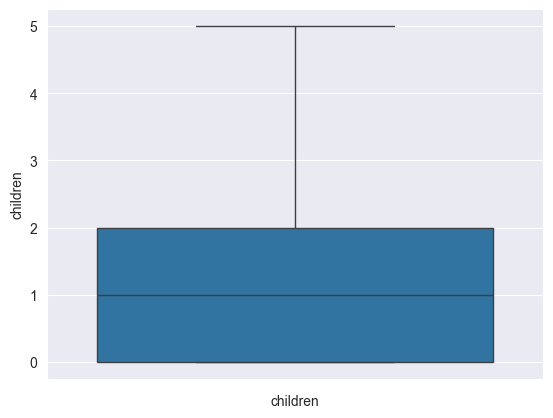

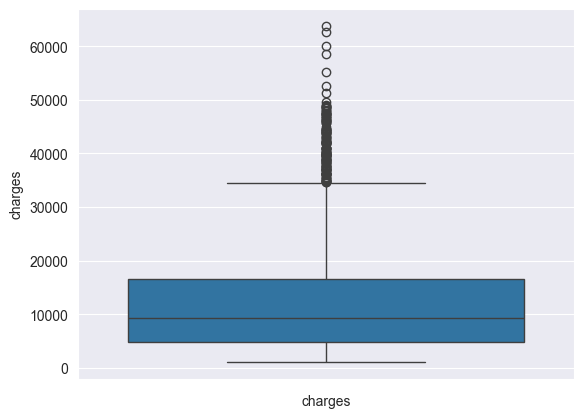

In [38]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [39]:
outlist = ["bmi"]

for col in outlist:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - 1.5*(IQR)
    UB = Q3 + 1.5*(IQR)

    df = [(df[col]>= LB) & (df[col]<= UB)]

In [41]:
df


[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 1333    True
 1334    True
 1335    True
 1336    True
 1337    True
 Name: bmi, Length: 1337, dtype: bool]